## Plan for today:

Solve exercise 3 and 4

* In particular we will solve the Buffer Stuck model using EGM (ex. 3)
* We will estimate the structural parameters using maximum likelihood and GMM (ex. 4)

# Exercise 3: The Buffer Stock Model

Consider the model

$$
\begin{eqnarray*}
V_{t}(M_{t},P_{t}) & = & \max_{C_{t}}\frac{C_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[V_{t+1}(M_{t+1},P_{t+1})\right]\\
 & \text{s.t.}\\
A_{t} & = & M_{t}-C_{t}\\
M_{t+1} & = & RA_{t}+Y_{t+1}
\end{eqnarray*}
$$

The new thing in the Buffer Stock model is how $Y_{t+1}$ is generated:



$$
\begin{eqnarray*}
M_{t+1} & = & RA_{t}+Y_{t+1}\\
Y_{t+1} & = & \xi_{t+1}P_{t+1}\\
P_{t+1} & = & GP_{t}\psi_{t+1}\\
\end{eqnarray*}
$$

$P_{t+1}$ is permanent income. 

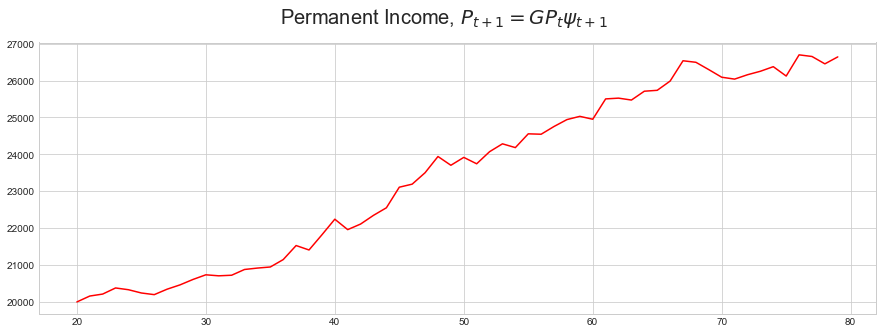

In [65]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

T = 60
time = np.arange(20,20+60)
G = 1.01
psi_std = 0.01
psi = np.exp(np.random.normal(-0.5*psi_std,psi_std,T))
P = np.zeros(T)
P[0] = 20000


for t in range(1,T):
    P[t] = P[t-1]*G*psi[t]
    
plt.figure(figsize=(15,5))
plt.plot(time,P, color = "red")
plt.suptitle('Permanent Income, $P_{t+1} = GP_{t}\psi_{t+1}$', fontsize=20)
plt.show()

In the model we can also add pension by introducing a variable called, $L_t$:

$$P_{t+1} = L_{t+1}GP_{t}\psi_{t+1}$$

This can create a large negative jump at age 65 for instance and make a flat income profile afterwards.

Next, permanent income feeds into the actual income by a transitory shock, $\xi_{t+1}$:

$$
\begin{eqnarray*}
M_{t+1} & = & RA_{t}+Y_{t+1}\\
Y_{t+1} & = & \underbrace{\xi_{t+1}}_{\text{Transitory shock}}P_{t+1}\\
P_{t+1} & = & GP_{t}\psi_{t+1}\\
\end{eqnarray*}
$$

Notice, transitory shocks only has a one period effect on income. 

Thus, the full model is:

$$
\begin{eqnarray*}
V_{t}(M_{t},P_{t}) & = & \max_{C_{t}}\frac{C_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[V_{t+1}(M_{t+1},P_{t+1})\right]\\
 & \text{s.t.}\\
A_{t} & = & M_{t}-C_{t}\\
M_{t+1} & = & RA_{t}+Y_{t+1}\\
Y_{t+1} & = & \xi_{t+1}P_{t+1}\\
P_{t+1} & = & GP_{t}\psi_{t+1}\\
A_{t} & \geq & -\lambda P_{t}\\
A_{T} & \geq & 0
\end{eqnarray*}
$$

We can allow for borrowing if $\lambda>0$.

* Introducing another state variable, $P_t$, is costly.
* Instead, we can divide through with permanent income, $P_t$, and get the Bellman equation in ratio form:

$$\begin{eqnarray*}
v_{t}(m_{t}) & = & \max_{c_{t}}\left\{ \frac{c_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[(G \psi_{t+1})^{1-\rho}v_{t+1}(m_{t+1})\right]\right\} \\
 & \text{s.t.}\\
 a_t & = & m_t-c_t \\
m_{t+1} & = & \frac{1}{G \psi_{t+1}}Ra_t+\xi_{t+1}\\ 
a_t &\geq& \lambda_t =  \begin{cases} 
-\lambda & \text{if $t$} < T_R\\
0 & \text{if $t$} \geq T_R
\end{cases} 
\end{eqnarray*}$$


How do we estimate the model?

We have learned two methods to estimate finite models:

1) Backwards induction

2) Time iteration

3) Today: We will use EGM

    


Recall the first order condition (remember utility is $u(c_t)=\frac{c_{t}^{1-\rho}}{1-\rho}$):

$$\underbrace{(c_{t})^{-\rho}}_{\text{marginal utility today}} =  \underbrace{ \beta R \mathbb{E}_t \left[ ( G \psi_{t+1})^{-\rho}\left( c_{t+1}\left( \frac{R}{G \psi_{t+1}}(m_t-c_t)+\xi_{t+1} \right)  \right)^{-\rho} \right]}_{\text{Expected marginal utility tomorrow}}$$

The marginal utility today must be equal to the expected marginal utility tomorrow.

Recall in time iteration, we solved the equation for $c_t^*$ for a grid over $m_t$:

$$\underbrace{(c_{t}^*)^{-\rho}}_{\text{marginal utility today}} = \underbrace{ \beta R \mathbb{E}_t \left[ ( G \psi_{t+1})^{-\rho}\left( c_{t+1}^*\left( \frac{R}{G \psi_{t+1}}(m_t-c_t^*)+\xi_{t+1} \right)  \right)^{-\rho} \right]}_{\text{Expected marginal utility tomorrow}}$$

We need a solver to find the solution $c_t^*$ for the different values of $m_t$.


Instead, we can make a fixed grid over $a_t=m_t-c_t$:

$$(c_{t})^{-\rho} =  \beta R \mathbb{E}_t \left[ ( G \psi_{t+1})^{-\rho}\left( c_{t+1}\left( \frac{R}{G \psi_{t+1}}a_t+\xi_{t+1} \right)  \right)^{-\rho} \right]$$

Then we can get a closed form solution for $c_{t}$:

$$c_{t}^* =   \mathbb{E}_t \left[\beta R ( G \psi_{t+1})^{-\rho}\left( c_{t+1}^*\left( \frac{R}{G \psi_{t+1}}a_t+\xi_{t+1} \right)  \right)^{-\rho} \right]^{-1/\rho} $$

And finally back out what $m_t$ is:

$$m_t=a_t+c_t$$

This is the EGM procedure!